## Assignment-05

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

In [1]:
# you code here
# 由于 %matplotlib inline 的存在，当输入plt.plot(x,y_1)后，不必再输入 plt.show()，图像将自动显示出来
%matplotlib inline
import numpy as np

In [3]:
random_data = np.random.random((20,2))

In [4]:
random_data

array([[0.58743987, 0.21554761],
       [0.92662949, 0.42580069],
       [0.17100126, 0.54977375],
       [0.09515701, 0.03094847],
       [0.81451921, 0.79317021],
       [0.3086075 , 0.51239067],
       [0.67145575, 0.02576901],
       [0.33506799, 0.74029406],
       [0.42699504, 0.07058655],
       [0.47510037, 0.86492655],
       [0.89054437, 0.03381696],
       [0.52678324, 0.6932045 ],
       [0.03146043, 0.09461783],
       [0.51159218, 0.12958205],
       [0.44332011, 0.60754759],
       [0.79139196, 0.30034314],
       [0.56647965, 0.06780451],
       [0.46016877, 0.59247671],
       [0.05177208, 0.37165368],
       [0.83052604, 0.83818774]])

In [6]:
import matplotlib.pyplot as plt
import random

In [10]:
x = random_data[:,0]
y = random_data[:,1]

In [11]:
y = [10.4 * i + 3 + random.randint(-3, 3) for i in x]

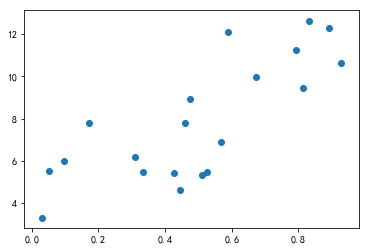

In [12]:
plt.scatter(x, y)

In [13]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression().fit(x.reshape(-1,1), y)

In [16]:
def f(x): 
    return reg.coef_ * x + reg.intercept_

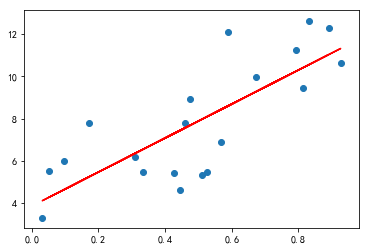

In [18]:
plt.scatter(x, y)
plt.plot(x, f(x), color='red')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

In [27]:
# you code here
from collections import Counter

In [30]:
random_data = np.random.random((20, 2))
X = random_data[:,0]
y = random_data[:,1]
print(y)

[0.11252672 0.94817044 0.92888352 0.17096226 0.49875083 0.42497865
 0.73950866 0.04611177 0.80610189 0.15269432 0.46430857 0.85812694
 0.41053133 0.89905317 0.06534979 0.42017554 0.59846877 0.56047405
 0.31375709 0.38720897]


In [46]:
y = (y>0.4)+0
print(y)

[0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0]


In [22]:
from scipy.spatial.distance import cosine

In [47]:
def model(x,y):
    return [(i,j) for i,j in zip(x,y)]

In [24]:
def distance(x1, x2):
    return cosine(x1, x2)

In [55]:
def predict(x, k=5):
    print(model(X, y))
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    print('最近邻',most_similars)
    #code here
    tar_list = [x[1] for x in most_similars]
    label = Counter(tar_list).most_common()[0][0]
    return label

In [56]:
predict(0.3,2)

[(0.5631986399713307, 0), (0.14058722992578687, 1), (0.8041061364184383, 1), (0.5411435594382478, 0), (0.6666313328095892, 1), (0.5492154985595594, 1), (0.08260970008165791, 1), (0.5238711187828342, 0), (0.8900244528846127, 1), (0.5807429499396699, 0), (0.3758614377099241, 1), (0.8266571042769081, 1), (0.20698894871171625, 1), (0.8323650779974453, 1), (0.8579089335986019, 0), (0.426720890274665, 1), (0.7857651865163435, 1), (0.6563859717915717, 1), (0.13063203174328486, 0), (0.8375584525985679, 0)]
最近邻 [(0.5631986399713307, 0), (0.14058722992578687, 1)]


0

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

In [4]:
from collections import Counter
import numpy as np

In [2]:
# you code here
def entropy(ele):
    counter = Counter(ele)
    pro = [counter[i]/len(ele) for i in ele]
    return -sum(p*np.log2(p) for p in pro)

In [5]:
entropy([0, 0, 0, 0])

-0.0

In [21]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [22]:
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)
print(dataset)

   bought  family_number gender income
0       1              1      F    +10
1       1              1      F    -10
2       1              2      F    +10
3       0              1      F    +10
4       0              1      M    +10
5       0              1      M    +10
6       1              2      M    -10


In [72]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple icecream

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [26]:
from icecream import ic

In [78]:
def find_the_min_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_spliter_1)
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_spliter_2)
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            entropy_v = (len(sub_spliter_1)/len(training_data[f]))*entropy_1 + (len(sub_spliter_2)/len(training_data[f]))*entropy_2  # change here 
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [79]:
find_the_min_spilter(dataset, 'bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 2.384080545409061
ic| sub_spliter_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 1.7029146752921864
ic| sub_spliter_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 2.384080545409061
ic| entropy_v: 1.7029146752921864
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 2.384080545409061
ic| sub_spliter_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 1.7029146752921864
ic| sub_spliter_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 2.384080545409061
ic| entropy_v: 1.7029146752921864
ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_spliter_1: [1, 1, 1, 0]
ic| entropy_1: 1.4338343733773984
ic| sub_spliter_2: [0, 0, 1]
ic| entropy_2: 1.3082708345352603
ic| entropy_v: 1.3800214281593393
ic| sub_spliter_1: [0, 0, 1]
ic| entropy_1: 1.3082708345352603
ic| sub_spliter_2: [1, 1, 1, 0]
ic| entropy_2: 1.433834373

spliter is: ('gender', 'M')
the min entropy is: 1.3800214281593393


('gender', 'M')

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:模型用于表示现实世界中的某个对象，模型或多或少的经过简化，这些模型都或多或少地“错”了，当模型能帮助我做出更好的决策并降低风险时，那么它就很有用。

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:欠拟合是模型没有很好地捕捉到数据特征，不能够很好地拟合数据，具有高偏差的特点，过拟合是模型泛化能力太差，具有高方差的特点。
过拟合的原因：
数据样本量太少，或者是对数据进行抽样的时候，抽样出现问题
数据中真正的样本少，而噪音大，模型学了太多的噪音
参数太多，模型复杂度过高
欠拟合的原因：
特征量过少
模型复杂度过低

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:准确率（正确率）=所有预测正确的样本/总的样本  （TP+TN）/总
精确率=  将正类预测为正类 / 所有预测为正类 TP/（TP+FP）
召回率 = 将正类预测为正类 / 所有正真的正类 TP/（TP+FN）
F值 = 精确率 * 召回率 * (1+β^^2 ) / (β^^2 精确率 + 召回率) （β=1 为F1 β=2 为F2）
AUC值为ROC曲线所覆盖的区域面积，显然，AUC越大，分类器分类效果越好。
AUC = 1，是完美分类器，采用这个预测模型时，不管设定什么阈值都能得出完美预测。绝大多数预测的场合，不存在完美分类器。
0.5 < AUC < 1，优于随机猜测。这个分类器（模型）妥善设定阈值的话，能有预测价值。
AUC = 0.5，跟随机猜测一样（例：丢铜板），模型没有预测价值。
AUC < 0.5，比随机猜测还差；但只要总是反预测而行，就优于随机猜测。
主要用于评估模型的泛化能力

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:机器学习是一类算法的总称，这些算法企图从大量历史数据中挖掘出其中隐含的规律，并用于预测或者分类，机器学习的目标是使学到的函数很好地适用于“新样本”，而不仅仅是在训练样本上表现很好。学到的函数适用于新样本的能力，称为泛化（Generalization）能力。

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

In [ ]:
Ans:机器学习的目的是得到可以泛化的模型，即在前所未见的数据上表现很好的模型，而过拟合则是核心难点。
    评价标准是衡量泛化能力的重要指标，确定了合适的评价标准可事半功倍。

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [32]:
# you code here
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)
print(dataset)

   bought  family_number gender income
0       1              1      F    +10
1       1              1      F    -10
2       1              2      F    +10
3       0              1      F    +10
4       0              1      M    +10
5       0              1      M    +10
6       1              2      M    -10


In [97]:
cols = list(dataset)
cols.insert(3,cols.pop(cols.index('bought')))
dataset = dataset.loc[:,cols]
print(dataset)

   family_number gender income  bought
0              1      F    +10       1
1              1      F    -10       1
2              2      F    +10       1
3              1      F    +10       0
4              1      M    +10       0
5              1      M    +10       0
6              2      M    -10       1


In [35]:
def entropy(ele):
    counter = Counter(ele)
    pro = [counter[i]/len(ele) for i in ele]
    return -sum(p*np.log2(p) for p in pro)
print(entropy(dataset['bought']))

3.417030077849957


In [111]:
from math import log
import operator

def calcShannonEnt(dataSet):  # 计算数据的熵(entropy)
    numEntries=len(dataSet) 
    labelCounts={}
    for featVec in dataSet:
        currentLabel=featVec[-1] # 每行数据的最后一个字（类别）
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1  # 统计有多少个类以及每个类的数量
    shannonEnt=0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries # 计算单个类的熵值
        shannonEnt-=prob*log(prob,2) # 累加每个类的熵值
        print(prob)
    return shannonEnt

def createDataSet1(dataframe_): 
    dataSet=[]
    labels = [e for e in dataframe_]
#     labels = labels[0:3]
    for i in range(len(labels)):
        tmp = dataframe_[labels[i]].tolist()
        dataSet.append(tmp)
    dataSet = [[row[i] for row in dataSet] for i in range(len(dataSet[0]))]
    label = labels[0:3]
        

    
    return dataSet,label

def splitDataSet(dataSet,axis,value): # 按某个特征分类后的数据
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec =featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

def chooseBestFeatureToSplit(dataSet):  # 选择最优的分类特征
    numFeatures = len(dataSet[0])-1
    baseEntropy = calcShannonEnt(dataSet)  # 原始的熵
    bestInfoGain = 0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value)
            prob =len(subDataSet)/float(len(dataSet))
            newEntropy +=prob*calcShannonEnt(subDataSet)  # 按特征分类后的熵
        infoGain = baseEntropy - newEntropy  # 原始熵与按特征分类后的熵的差值
        if (infoGain>bestInfoGain):   
            bestInfoGain=infoGain
            bestFeature = i
    return bestFeature

def majorityCnt(classList):    
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
        classCount[vote]+=1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

def createTree(dataSet,labels):
    classList=[example[-1] for example in dataSet]  
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat=chooseBestFeatureToSplit(dataSet) #选择最优特征
    bestFeatLabel=labels[bestFeat]
    print('最优特征',bestFeatLabel)
    myTree={bestFeatLabel:{}} #分类结果以字典形式保存
    del(labels[bestFeat])
    featValues=[example[bestFeat] for example in dataSet]
    uniqueVals=set(featValues)
    for value in uniqueVals:
        subLabels=labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataSet\
                            (dataSet,bestFeat,value),subLabels)
    return myTree


    return predict
if __name__=='__main__':
    dataSet, label=createDataSet1(dataset)  # 创造示列数据
    print(dataSet,label)
    print('决策树：',createTree(dataSet, label))  # 输出决策树模型结果


[[1, 'F', '+10', 1], [1, 'F', '-10', 1], [2, 'F', '+10', 1], [1, 'F', '+10', 0], [1, 'M', '+10', 0], [1, 'M', '+10', 0], [2, 'M', '-10', 1]] ['family_number', 'gender', 'income']
0.5714285714285714
0.42857142857142855
0.4
0.6
1.0
0.6666666666666666
0.3333333333333333
0.75
0.25
0.4
0.6
1.0
最优特征 family_number
0.4
0.6
1.0
0.6666666666666666
0.3333333333333333
0.25
0.75
1.0
最优特征 gender
0.6666666666666666
0.3333333333333333
0.5
0.5
1.0
最优特征 income
决策树： {'family_number': {1: {'gender': {'M': 0, 'F': {'income': {'+10': 1, '-10': 1}}}}, 2: 1}}
